In [9]:
import bs4 as bs
import urllib.request
import re
import nltk


scraped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Cappuccino')
article = scraped_data. read()
parsed_article = bs.BeautifulSoup(article,'html.parser')
paragraphs = parsed_article.find_all('p')
article_text = ""
for p in paragraphs:
    article_text +=p.text

In [21]:
print(article_text[0:2000])

A cappuccino (/ˌkæpʊˈtʃiːnoʊ/ ⓘ; Italian pronunciation: [kapputˈtʃiːno]; Italian plural: cappuccini from German Kapuziner[1]) is an espresso-based coffee drink    that is traditionally prepared with steamed milk foam (microfoam).[2]
Variations of the drink involve the use of cream instead of milk, using non-dairy milk substitutes and flavoring with cinnamon (in the United States) or chocolate powder (in Europe).[3][4] It is typically smaller in volume than a caffè latte, with a thicker layer of microfoam.[5]
The name comes from the Capuchin friars, referring to the color of their habits,[6] and in this context referring to the color of the beverage when milk is added in small portion to dark, brewed coffee[7] (today mostly espresso). The physical appearance of a modern cappuccino with espresso créma and steamed milk is a result of a long evolution of the drink.
According to a popular but unverified legend, cappuccino was invented by the Italian Capuchin friar Marco d'Aviano after the B

#### Convert to a list of words

In [23]:
try:
    import string
    from nltk.corpus import stopwords
    import nltk
except Exception as e:
    print(e)
    
class PreProcessText(object):
    
    def __init__(self):
        pass
    
    def __remove_punctuation(self,text):
        message=[]
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message=''.join(message)
        return message

    def __remove_stopwords(self,text):
        words=[]
        for x in text.split():
            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    def token_words(self,text=''):
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

In [25]:
import nltk
flag = nltk.download("stopwords")

if (flag == "False" or flag == False):
    print("Failed to Download Stop Words")
else:
    print("Downloaded stopwords...")
    helper = PreProcessText()
    words = helper.token_words(text=article_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Niitro_musics\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Downloaded stopwords...


In [30]:
words[0:5]

['cappuccino', 'ˌkæpʊˈtʃiːnoʊ', 'ⓘ', 'Italian', 'pronunciation']

#### step 3

In [48]:
from gensim.models import Word2Vec

model = Word2Vec([words], vector_size=100, window=5, min_count=0, workers=4)
#vocabulary = model.wv.vocab
vocabulary = model.wv.key_to_index
index_to_key = model.wv.index_to_key
sim_words = model.wv.most_similar('taste')
print(sim_words)

[('spreading', 0.32785552740097046), ('thicker', 0.28457850217819214), ('quality', 0.2833499610424042), ('earlier', 0.2741846442222595), ('mid1990s', 0.248183935880661), ('milkcitation', 0.24652992188930511), ('Viennois', 0.2367493212223053), ('changed', 0.23615455627441406), ('Kingdom', 0.22503800690174103), ('stores', 0.21880564093589783)]


In [56]:
X = model.wv[model.wv.key_to_index]


C:\Users\Niitro_musics\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9432 (\N{CIRCLED LATIN SMALL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


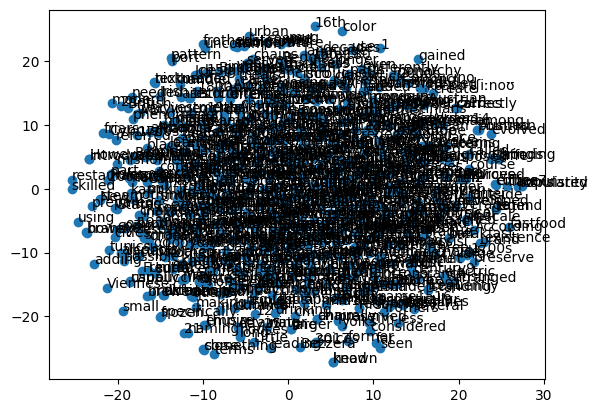

In [66]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
vectors_2d=tsne.fit_transform(X)

for word, (x,y) in zip(model.wv.index_to_key, vectors_2d):
    plt.text(x,y,word)  
    
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.show()

In [68]:
#this block was done by using CHatGPT
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming 'texts' is a list of preprocessed text data, and 'labels' is a list of corresponding labels (0 or 1)
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert texts to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(texts_train)
X_test_tfidf = tfidf_vectorizer.transform(texts_test)

# Use Word2Vec vectors as additional features
X_train_w2v = np.array([model.wv[token] for tokens in texts_train])
X_test_w2v = np.array([model.wv[token] for tokens in texts_test])

# Concatenate TF-IDF vectors and Word2Vec vectors
X_train_combined = np.concatenate((X_train_tfidf.toarray(), X_train_w2v), axis=1)
X_test_combined = np.concatenate((X_test_tfidf.toarray(), X_test_w2v), axis=1)

# Train a classifier (e.g., Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X_train_combined, labels_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_combined)

# Evaluate the model
accuracy = accuracy_score(labels_test, predictions)
print(f"Accuracy: {accuracy}")


NameError: name 'texts' is not defined